<h1 style="text-align: center;" markdown="1">Machine Learning Algorithms for Digital Wage Payment Prediction</h1> 
<h2 style="text-align: center;" markdown="2">An AIMS Masters project in Collaboration with the Global Centre on Digital Wages for Decent Work (ILO)</h2>


> *The widespread adoption of digital payments has become increasingly important. In light of this, the aim of this project is to investigate the probability of an individual receiving digital wages in Africa. To achieve this, a series of empirical comparative assessments of machine learning classification algorithms will be conducted. The objective is to determine the effectiveness of these algorithms in predicting digital wage payments. Therefore, this notebook forms part of a larger project that seeks to explore the potential of machine learning in addressing issues related to financial inclusion in Africa.*

<h1 style="text-align: center;" markdown="3">Algorithm Comparative Assessment</h1> 
<h2 style="text-align: center;" markdown="3">Part 1: Full Feature Dataset Merged</h2> 

# Table of Contents
[Introduction](#introduction)  
[Data Setup](#data-setup)  
[Model Results using Simple Feature Set](#simple)  
[Model Results using Full Feature Set](#full)  
[Model Results including Class Balancing, Tuning, CV, and Feature Selection](#all)  
[Summary](#summary)



# Introduction <a class="anchor" id="introduction"></a>

Now that we have implemented all ten algorithms, we can bring all the results together for a final comparative assessment. As we compare the performance of these classifiers, there are a few things to keep in mind:
* Each algorithm has specific benefits and drawbacks. Though we are making a quantitative assessment based on several metrics, there are tradeoffs that should be considered, such as which metric we are most concerned with in a particular scenario, computational efficiency, and the ability to rank and select features.
* Though we demonstrate feature tuning and some model augmentation techniques for each algorithm, this project does not seek to find the optimum implementation of each model. It is very likely that with more detailed model development and feature engineering, certain algorithms could reach a higher level of performance on this dataset. We only seek to build a baseline comparison in this project.

# Data Setup <a class="anchor" id="data-setup"></a>

All of our model results are stored in the `models` directory and in their respective country folder. To compare results, we have built a few helpful functions within the `evaluation` and `visualization` directories that will help us load the models we want to compare and plot their metrics.

In [1]:
%matplotlib inline

import os
from pathlib import Path
import sys
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from IPython.display import display
import seaborn as sns
sns.set()

# Add our local functions to the path
sys.path.append(os.path.join(os.pardir, 'src'))
from models import evaluation
from visualization import visualize
from data.load_data import (get_data_filepaths, 
                            split_features_labels_weights, 
                            load_data)
from features.process_features import get_vif, standardize

COUNTRY = 'best models'
TRAIN_PATH, TEST_PATH = get_data_filepaths(COUNTRY)


In [2]:
%load_ext autoreload
%autoreload 1
%aimport models.evaluation
%aimport visualization.visualize

# Model Results using Simple Feature Set <a class="anchor" id="simple"></a>

We'll begin by comparing the results of all models using the simple feature set. To give a basic idea of model rank, we rank each model metric from best to worst and take the average across all metrics. 

This gives us a general idea of how the default models perform using only a small subset of features for this problem.

In [10]:
# set allowed model names (nothing from later notebooks)
allowed_models = ['xgb', 'rf'] #

In [11]:
files = os.listdir(os.path.join(evaluation.MODELS_DIR, COUNTRY))
models = [f[:-4] for f in files if f[-4:] == '.pkl']
# models = [f for f in models if f[-6:] == 'simple']

# only include models from prior notebooks
models = [f for allowed in allowed_models for f in models if allowed in f]

,accuracy,recall,precision,f1,cross_entropy,roc_auc,cohen_kappa,mean_rank
xgb_final,0.806732,0.871099,0.818369,0.843911,0.412976,0.878330,0.497999,1.000000
rf_final,0.791659,0.844887,0.814632,0.829484,0.429839,0.875281,0.481680,2.000000


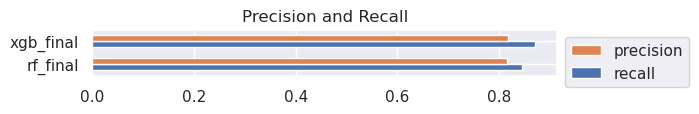

In [12]:
metrics = [evaluation.load_model_metrics(f, COUNTRY) for f in models]
results = visualize.display_model_comparison(metrics, 
                                             show_roc=False, 
                                             show_cm=False, 
                                             show_dig_rate_error=True, 
                                             highlight_best=True, 
                                             transpose=True, 
                                             rank_order=True)
visualize.display_precision_recall(results)

In the results above, it appears that the baseline Logistic Regression model gives us the highest average performance across metrics. However, it has a very low recall level, which we expect since we did not apply any class balancing to the simple models. The default LDA model appears to give us at least some level of recall, but it is too low to realistically be useful.

Since several models give us some idea of feature importance or ranking, we can also to evaluate which features are most influential across models. We use a similar ranking method as with the metrics, where we'll take the models that give us a quantitative ranking and average the rank across all. 

As a reminder, the following models gave us an idea of feature ranking, either by the coefficients or the feature importances:

Model | abs(coef*stdev) | feature importance
--- | ---
Logistic Regression | ✓ | 
LDA | ✓ |
KNN | | 
Naive Bayes | |
SVM | |
Decision Trees | | ✓
Random Forests | | ✓
XGBoost | | ✓
MLP | | 
Deep Learning | |

In [13]:
feats = evaluation.load_feats(models, COUNTRY)
visualize.display_feat_ranks(feats);

ValueError: No objects to concatenate

# Model Results using Full Feature Set <a class="anchor" id="full"></a>

Now let's examine how the models performed with default settings on the full feature set. 

In [14]:
files = os.listdir(os.path.join(evaluation.MODELS_DIR, COUNTRY))
models = [f[:-4] for f in files if f[-4:] == '.pkl']
# models = [f for f in models if f[-len('full'):] == 'full']
models = [f for f in models if ('full' in f)]

In [15]:
metrics = [evaluation.load_model_metrics(f, COUNTRY) for f in models]
results = visualize.display_model_comparison(metrics, 
                                             show_roc=False, 
                                             show_cm=False, 
                                             show_dig_rate_error=False, 
                                             highlight_best=True, 
                                             transpose=True, 
                                             rank_order=True)
visualize.display_precision_recall(results)

ValueError: No objects to concatenate

With the full feature set, the baseline Logistic Regression model remains at the top. The recall is still rather low, though. The MLP model achieves a much better recall while maintaining an average level of precision. 

The Deep Learning model in this case does not perform well without some type of class balancing.